In [202]:
import pandas as pd
import numpy as np

In [203]:
dados_ldwss_1 = pd.read_csv('2022-10-15-waveform_classified.csv',
                       header = None)
dados_ldwss_2 = pd.read_csv('2022-10-16-waveform_classified.csv',
                       header = None)
dados_ldwss = pd.concat([dados_ldwss_1, dados_ldwss_2], 
                        ignore_index = True).rename(columns = {1100:'day',
                                                               1101:'month',
                                                               1102:'year',
                                                               1103:'hour',
                                                               1104:'minute',
                                                               1105:'second',
                                                               1106:'microsecond',
                                                               1107:'channel',
                                                               1108:'prediction'})
dados_ldwss['sec_microsec'] = dados_ldwss['second'] + dados_ldwss['microsecond'].div(1e6)


dados_ldwss.prediction[(dados_ldwss.prediction == 2) | (dados_ldwss.prediction == 3) | (dados_ldwss.prediction == 5) | (dados_ldwss.prediction == 6) | (dados_ldwss.prediction == 7)] = 4
dados_ldwss.prediction[(dados_ldwss.prediction == 4)] = 2
dados_ldwss

C:\Users\gabri\AppData\Local\Temp\ipykernel_9536\2326770473.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ldwss.prediction[(dados_ldwss.prediction == 2) | (dados_ldwss.prediction == 3) | (dados_ldwss.prediction == 5) | (dados_ldwss.prediction == 6) | (dados_ldwss.prediction == 7)] = 4
C:\Users\gabri\AppData\Local\Temp\ipykernel_9536\2326770473.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ldwss.prediction[(dados_ldwss.prediction == 4)] = 2


,0,1,2,3,4,5,6,7,8,9,...,day,month,year,hour,minute,second,microsecond,channel,prediction,sec_microsec
0,-1.718868,2.284010,7.286887,14.289764,24.292643,0.295523,-4.701597,-18.698718,-41.695840,-50.692964,...,15,10,2022,16,35,8,611590,1,0,8.611590
1,36.964278,36.958894,28.953513,32.948134,36.942756,27.937381,24.932007,33.926636,19.921266,3.915897,...,15,10,2022,17,11,13,704834,1,0,13.704834
2,3.924610,7.929209,14.933808,15.938409,13.943010,38.947613,35.952217,21.956824,17.961432,19.966042,...,15,10,2022,17,16,37,0,1,2,37.000000
3,42.904752,36.900227,30.895705,43.891184,65.886667,76.882154,99.877646,144.873144,171.868651,195.864169,...,15,10,2022,17,55,15,553864,1,2,15.553864
4,-7.414626,-17.414610,-20.414595,-19.414581,-8.414568,-22.414556,-4.414545,6.585465,-1.414524,-4.414513,...,15,10,2022,18,58,43,764752,1,2,43.764752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,4.203221,7.208344,-3.786533,-2.781410,12.223713,17.228837,16.233961,35.239087,68.244216,40.249348,...,17,10,2022,1,5,40,420008,1,0,40.420008
2025,-3.559746,-3.560718,-3.561689,-2.562661,0.436367,0.435395,0.434423,2.433451,0.432480,-1.568492,...,17,10,2022,1,9,16,705037,2,0,16.705037
2026,-11.987128,-6.988443,-6.989759,-16.991076,2.007607,7.006289,-6.995028,-8.996345,-6.997663,-17.998982,...,17,10,2022,1,9,16,745972,1,0,16.745972
2027,-9.269712,-12.269666,-11.269620,-7.269576,-9.269532,-8.269488,-7.269445,-5.269403,-8.269361,-6.269319,...,17,10,2022,1,13,26,223994,2,0,26.223994


In [204]:
dados_en_1 = pd.read_csv('adonis_pulse20221015.csv',
                        low_memory = False)
dados_en_2 = pd.read_csv('adonis_pulse20221016.csv',
                       low_memory = False)
dados_en_3 = pd.read_csv('adonis_pulse20221017.csv',
                       low_memory = False)

dados_en = pd.concat([dados_en_1, dados_en_2, dados_en_3], 
                        ignore_index = True)

dados_en['year'] = dados_en.timestamp.str.split('-|T|:').str[0]
dados_en['month'] = dados_en.timestamp.str.split('-|T|:').str[1]
dados_en['day'] = dados_en.timestamp.str.split('-|T|:').str[2]
dados_en['hour'] = dados_en.timestamp.str.split('-|T|:').str[3]
dados_en['minute'] = dados_en.timestamp.str.split('-|T|:').str[4]
dados_en['sec_microsec'] = dados_en.timestamp.str.split('-|T|:').str[5]

dados_en = dados_en.drop(['timestamp',
                         'icheight',
                         'numbersensors',
                         'majoraxis',
                         'minoraxis',
                         'bearing'], axis=1).astype('float')
dados_en.type[(dados_en.type == 1)] = 2
dados_en.type[(dados_en.type == 40)] = 0
dados_en.type[(dados_en.type == 0) & (dados_en.peakcurrent >= 0)] = 1

In [205]:
dados_en

,type,latitude,longitude,peakcurrent,year,month,day,hour,minute,sec_microsec
0,0.0,31.028589,-109.782853,-50444.0,2022.0,10.0,15.0,16.0,0.0,29.935115
1,2.0,31.000479,-109.727191,1714.0,2022.0,10.0,15.0,16.0,0.0,29.911590
2,0.0,31.001715,-109.874134,-10230.0,2022.0,10.0,15.0,16.0,1.0,53.214734
3,0.0,31.033071,-109.851296,-14718.0,2022.0,10.0,15.0,16.0,5.0,3.017573
4,2.0,31.018420,-109.805442,-2683.0,2022.0,10.0,15.0,16.0,5.0,2.920486
...,...,...,...,...,...,...,...,...,...,...
103812,0.0,31.373140,-105.297017,-5899.0,2022.0,10.0,16.0,23.0,59.0,56.885808
103813,2.0,31.347793,-105.313877,-2570.0,2022.0,10.0,16.0,23.0,59.0,56.788892
103814,2.0,31.382294,-105.322915,1817.0,2022.0,10.0,16.0,23.0,59.0,56.672671
103815,2.0,31.351285,-105.296630,2338.0,2022.0,10.0,16.0,23.0,59.0,56.794855


In [206]:
vec_en = [dados_en.sec_microsec*1e6,
          dados_en.minute*60*1e6,
          dados_en.hour*60*60*1e6,
          dados_en.day*24*60*60*1e6,
          dados_en.month*30*24*60*60*1e6,
          dados_en.year*12*30*24*60*60*1e6]

vec_ldwss = [dados_ldwss.sec_microsec*1e6,
             dados_ldwss.minute*60*1e6,
             dados_ldwss.hour*60*60*1e6,
             dados_ldwss.day*24*60*60*1e6,
             dados_ldwss.month*30*24*60*60*1e6,
             dados_ldwss.year*12*30*24*60*60*1e6]




In [207]:
time_en = vec_en[0] + vec_en[1] + vec_en[2] + vec_en[3] + vec_en[4] + vec_en[5] 
time_ldwss = vec_ldwss[0] + vec_ldwss[1] + vec_ldwss[2] + vec_ldwss[3] + vec_ldwss[4] + vec_ldwss[5]

In [208]:
dados_en['time_en'] = time_en
dados_ldwss['time_ldwss'] = time_ldwss

In [209]:
#dados_ldwss.iloc[179, 1100:1110]

In [210]:
#dados_en.iloc[29000, :]

In [220]:
contador = 0
corr_vec = []
corr_vec_2 = []
rep_vec = []
i_0 = 0 

rep_tensor = [0, 0]
corr_tensor = []

for i, ldwss_value in enumerate(dados_ldwss.time_ldwss):
    for j, en_value in enumerate(dados_en.time_en):
        
        delta = abs(en_value - ldwss_value)
        
        if delta < 100*1e3:
            
            if i_0 == i:
                rep_vec.append(j)
            else:
                rep_vec = [j]

            corr_vec.append(i)   # VETOR DE CORRESPONDENCIAS
        
            #print(f'LDWSS:{i}({ldwss_type})   EN:{j}({en_type})   {rep_vec}')
           
            contador = contador + 1
            i_0 = i
    
    
    if rep_vec != [] and len(rep_vec) <= 5:
        corr_vec_2.append(rep_vec)
        rep_tensor[0] = [i]
        rep_tensor[1] = rep_vec
        
        corr_tensor.append(rep_tensor)
        #print(corr_tensor, end = '\n')
    rep_vec = []  
    rep_tensor = [0, 0]
        
contador

2106

In [221]:
unique, counts = np.unique(corr_vec, return_counts=True)
dict(zip(unique, counts))
unique, counts_2 = np.unique(counts, return_counts=True)
dict(zip(unique, counts_2))

{1: 335,
 2: 222,
 3: 113,
 4: 77,
 5: 45,
 6: 21,
 7: 15,
 8: 5,
 9: 5,
 10: 3,
 11: 2,
 12: 2,
 13: 2,
 14: 1,
 23: 1}

In [222]:
vec = []
for k in corr_vec_2:
    vec.append(len(k))


In [223]:
unique, counts_3 = np.unique(vec, return_counts=True)
dict(zip(unique, counts_3))

{1: 335, 2: 222, 3: 113, 4: 77, 5: 45}

In [224]:
dict_ldwss = {0:'-CG', 1:'+CG', 2:'IC'}
dict_en = {0:'-CG', 1:'+CG', 2:'IC'}

In [225]:
type_vec_en = []
ldwss_en = pd.DataFrame()

for w_vec in corr_tensor:
    index_ldwss = w_vec[0]
    index_en =  w_vec[1]
    
    type_ldwss = dados_ldwss.prediction[index_ldwss[0]]
    for _ in index_en:
        type_vec_en.append(int(dados_en.type[_]))
    
    if type_vec_en.count(type_vec_en[0]) == len(type_vec_en):
        
        type_en = type_vec_en[0]
        #print(f'LDWSS:{type_ldwss}  EN:{type_en}')
        ldwss_en_event = dados_ldwss.loc[index_ldwss, :]
        ldwss_en_event['type'] = type_en
        
        ldwss_en = pd.concat([ldwss_en, ldwss_en_event], ignore_index = True)
                             
    type_vec_en = []

In [226]:
ldwss_en

,0,1,2,3,4,5,6,7,8,9,...,year,hour,minute,second,microsecond,channel,prediction,sec_microsec,time_ldwss,type
0,1.587454,-7.416823,-14.421100,-5.425378,-10.429656,-18.433935,-14.438215,-9.442496,-21.446778,-24.451061,...,2022,19,21,18,295982,1,0,18.295982,6.291957e+16,0
1,93.087342,107.078711,95.070086,74.061467,65.052853,61.044243,38.035637,35.027034,44.018433,41.009834,...,2022,20,5,35,129698,1,2,35.129698,6.291958e+16,0
2,18.635547,11.638855,10.642164,15.645474,21.648785,28.652097,31.655410,17.658726,7.662043,6.665360,...,2022,20,42,44,219717,1,0,44.219717,6.291958e+16,2
3,1.563168,1.563446,1.563723,4.564001,-0.435721,2.564557,3.564835,1.565113,1.565391,2.565670,...,2022,20,54,51,482864,2,0,51.482864,6.291958e+16,0
4,20.884603,25.889265,9.893928,19.898592,24.903257,19.907924,21.912592,21.917261,25.921932,8.926604,...,2022,21,26,4,268013,1,0,4.268013,6.291958e+16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,9.926968,23.927574,29.928181,23.928789,21.929399,13.930010,3.930622,-0.068765,-3.068153,-11.067541,...,2022,20,51,36,274353,2,0,36.274353,6.291967e+16,0
533,-0.127510,0.873057,2.873624,-1.125809,1.874758,1.875326,-0.124107,0.876460,0.877028,1.877595,...,2022,20,51,36,290383,2,0,36.290383,6.291967e+16,0
534,86.303666,53.302437,59.301212,83.299991,90.298775,58.297564,4.296357,-25.704850,-57.706059,-72.707271,...,2022,21,21,18,318882,1,0,18.318882,6.291967e+16,1
535,104.019015,104.018055,102.017102,102.016154,103.015214,101.014279,97.013352,97.012430,93.011514,89.010604,...,2022,21,42,50,478340,2,0,50.478340,6.291967e+16,0


In [230]:
names = ['-CG', '+CG', 'IC']

Text(0.5, 37.5, 'Classe predita')

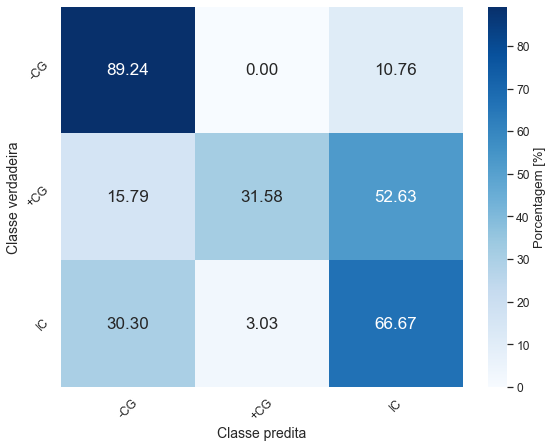

In [235]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# CONFUSION MATRIX
conf_mat = confusion_matrix(ldwss_en.type, ldwss_en.prediction)

conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(font_scale=1.1)
df_cm = pd.DataFrame(conf_mat_norm, index = names,
                  columns = names)
plt.figure(figsize = (9,7))
sns.heatmap(df_cm*100, annot=True, fmt='.2f', cmap='Blues', 
            annot_kws={"size": 17},
            cbar_kws={'label':'Porcentagem [%]'})

plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.ylabel('Classe verdadeira', fontsize=14)
plt.xlabel('Classe predita', fontsize=14)



In [237]:
from sklearn.metrics import classification_report

report = classification_report(ldwss_en.type, ldwss_en.prediction, target_names=names, digits=4)
print(report)

              precision    recall  f1-score   support

         -CG     0.8560    0.8924    0.8738       353
         +CG     0.5455    0.3158    0.4000        19
          IC     0.6962    0.6667    0.6811       165

    accuracy                         0.8026       537
   macro avg     0.6992    0.6249    0.6516       537
weighted avg     0.7959    0.8026    0.7978       537

